In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#pip install seaborn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

In [ ]:
#pip install keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
diabetes_data= pd.read_csv("diabetes.csv")

In [5]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.shape

(768, 9)

## Prediction : before cleaning

In [7]:
X=diabetes_data.iloc[:,:8]
Y=diabetes_data["Outcome"]

In [8]:
x_train, x_test, y_train, y_test= train_test_split(X,Y, test_size=0.2, random_state=0) 

In [9]:
regressor=LogisticRegression()
regressor.fit(x_train, y_train)

C:\Users\navya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [10]:
y_pred=regressor.predict(x_test)

In [11]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[98,  9],
       [18, 29]], dtype=int64)

<AxesSubplot:>

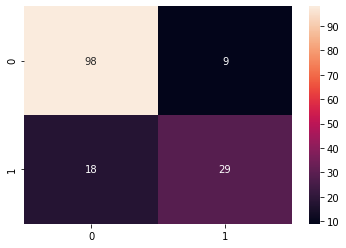

In [12]:
sns.heatmap(cm, annot=True)

In [13]:
print("Recall score: ", recall_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))     

Recall score:  0.6170212765957447
Accuracy score:  0.8246753246753247


___________________________________________________

## Cleaning

In [14]:
# checking missing values
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<font color="green"> ***There aren't any missing values***

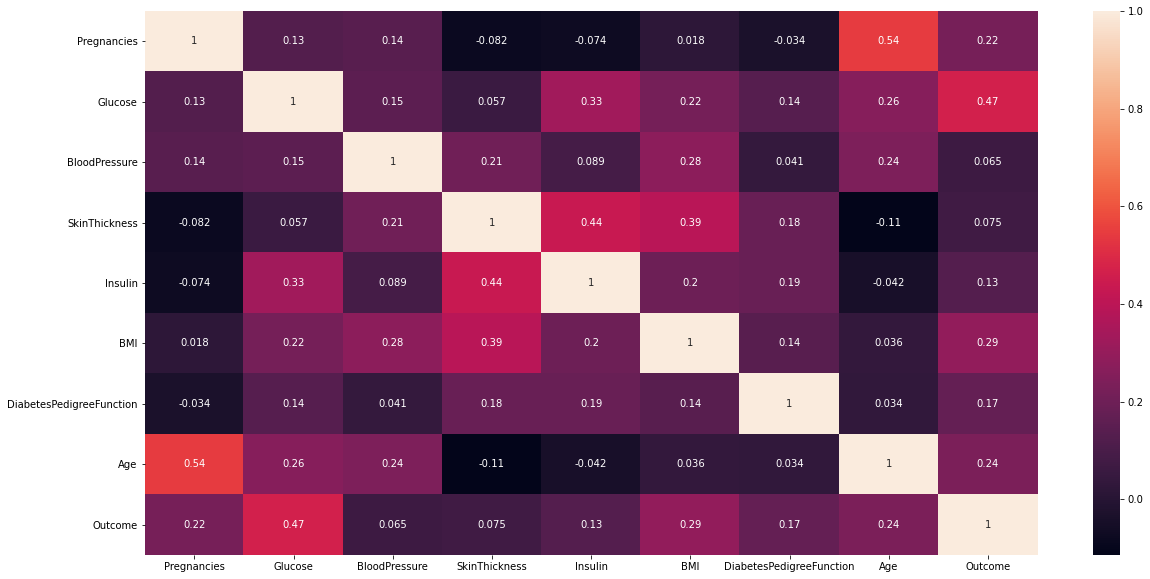

In [15]:
#get correlations of each features in dataset
corrmat = diabetes_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(diabetes_data[top_corr_features].corr(),annot=True)

<font color='green'> The independent features are not correlated to each other which is a good sign.

## Checking outliers

In [ ]:
#data.groupby('Outcome').hist(figsize=(9, 9))

<AxesSubplot:>

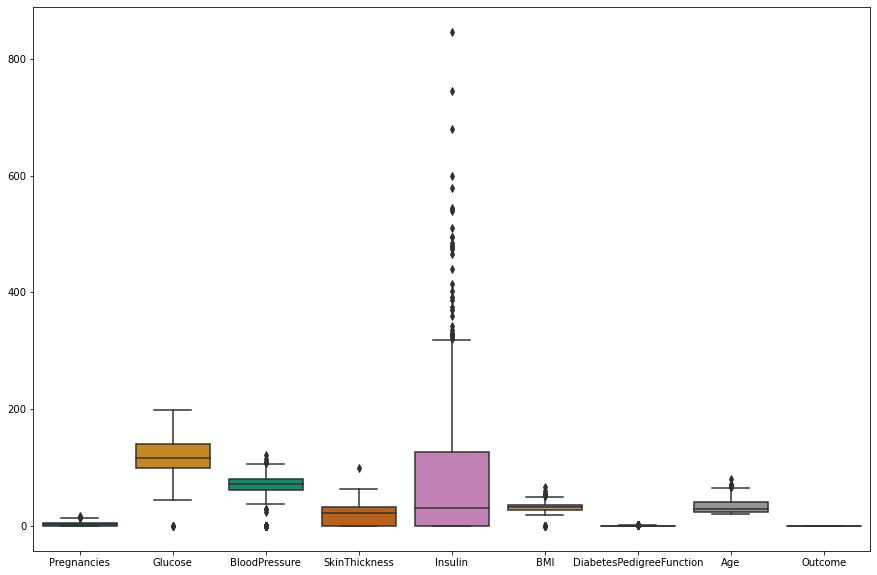

In [16]:
plt.figure(figsize=(15,10))
sns.boxplot(data=diabetes_data, palette="colorblind")

In [17]:
diabetes_data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

<font color= "green">  ***Data is skewed that means outliers exist***

C:\Users\navya\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\navya\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\navya\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

<AxesSubplot:xlabel='Age', ylabel='Density'>

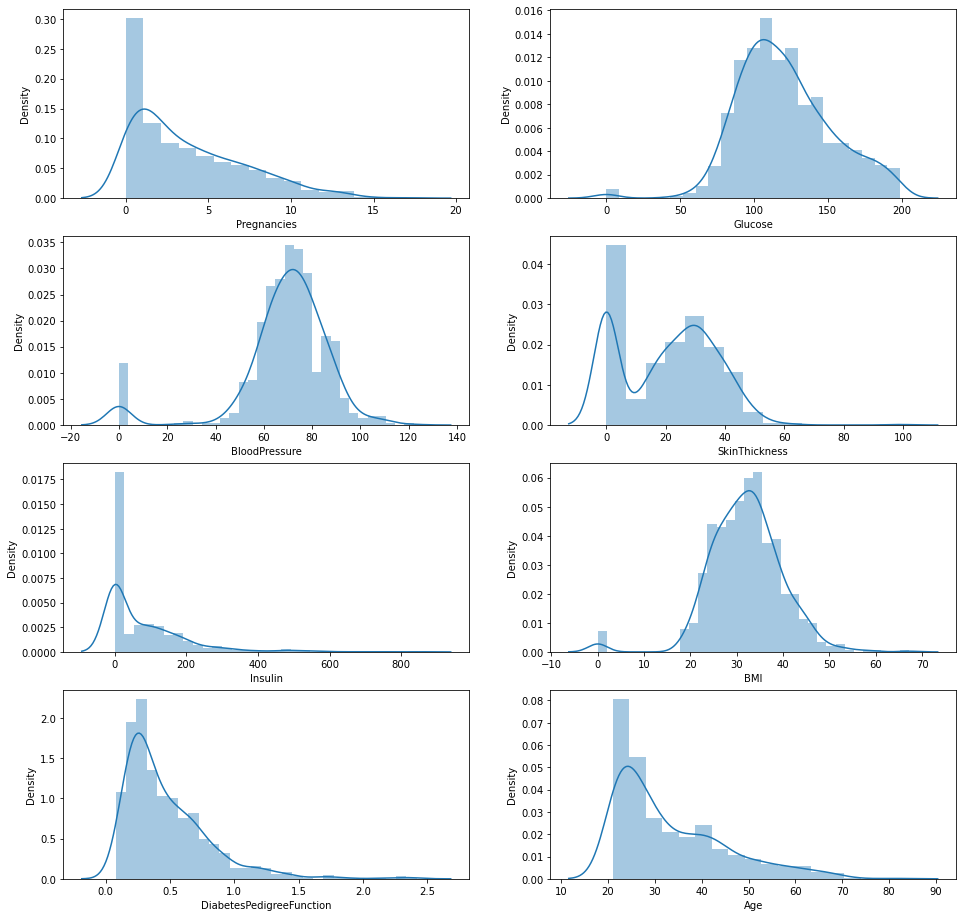

In [18]:
# Distplot

fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(diabetes_data['Pregnancies'],ax=ax2[0][0])
sns.distplot(diabetes_data['Glucose'],ax=ax2[0][1])
sns.distplot(diabetes_data['BloodPressure'],ax=ax2[1][0])
sns.distplot(diabetes_data['SkinThickness'],ax=ax2[1][1])
sns.distplot(diabetes_data['Insulin'],ax=ax2[2][0])
sns.distplot(diabetes_data['BMI'],ax=ax2[2][1])
sns.distplot(diabetes_data['DiabetesPedigreeFunction'],ax=ax2[3][0])
sns.distplot(diabetes_data['Age'],ax=ax2[3][1])

#### <font color='green'> From the distribution it can be seen in some of the independent features value is denoted as 0. Which is impossible for a human being to have.*

#### Checking outliers in all the independent features :

In [19]:
#Pregnancies
(diabetes_data.Pregnancies==0).value_counts()

False    657
True     111
Name: Pregnancies, dtype: int64

<font color='green'> - Incase of ***pregnancy***, it is possible to have zero as a value.

False    763
True       5
Name: Glucose, dtype: int64


<AxesSubplot:xlabel='Glucose', ylabel='count'>

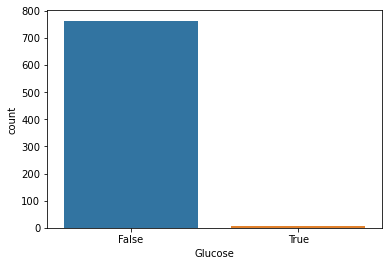

In [20]:
#Glucose
print((diabetes_data.Glucose==0).value_counts())
temp=diabetes_data['Glucose']==0
sns.countplot(x=temp)

<font color= "green"> - Even after fasting ***glucose levels*** would not be as low as zero. Therefore zero is an invalid reading. By observing the data we can see 5 counts where the value is 0.

False    733
True      35
Name: BloodPressure, dtype: int64


<AxesSubplot:xlabel='BloodPressure', ylabel='count'>

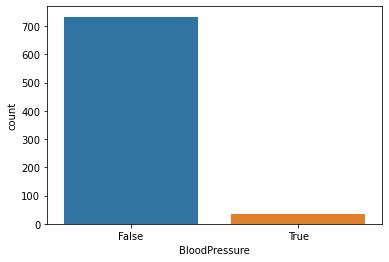

In [21]:
#BloodPressure
print((diabetes_data.BloodPressure==0).value_counts())
#(data.BloodPressure==0).value_counts().plot("bar")
temp=diabetes_data['BloodPressure']==0
sns.countplot(x=temp)

<font color= "green"> - Similarly living person cannot have ***blood pressure*** as '0'. By observing the data we can see 35 counts where the value is 0.

False    541
True     227
Name: SkinThickness, dtype: int64


<AxesSubplot:xlabel='SkinThickness', ylabel='count'>

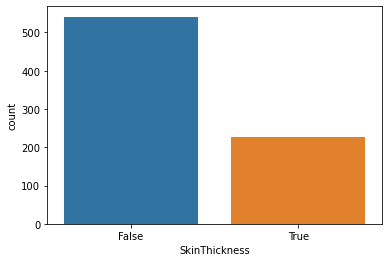

In [22]:
#SkinThickness
print((diabetes_data.SkinThickness==0).value_counts())
#(data.SkinThickness==0).value_counts().plot('bar')
temp=diabetes_data['SkinThickness']==0
sns.countplot(x=temp)

<font color= "green"> - For normal people, ***skin fold thickness*** can’t be less than 10 mm. Total count where value is 0 are ***227***.

False    394
True     374
Name: Insulin, dtype: int64


<AxesSubplot:xlabel='Insulin', ylabel='count'>

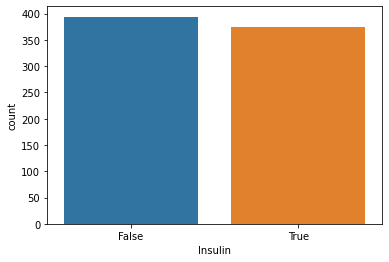

In [23]:
#Insulin
print((diabetes_data.Insulin==0).value_counts())
#(data.Insulin==0).value_counts().plot('bar')
temp=diabetes_data['Insulin']==0
sns.countplot(x=temp)

<font color= "green"> - The normal **insulin** range lies between ***16-166 mIU/L***. So the data is inavlid where its mentioned as 0. There are total ***374*** invalid readings

False    757
True      11
Name: BMI, dtype: int64


<AxesSubplot:xlabel='BMI', ylabel='count'>

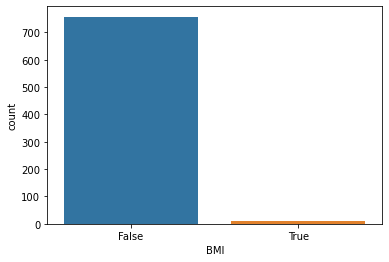

In [24]:
#BMI
print((diabetes_data.BMI==0).value_counts())
#(data.BMI==0).value_counts().plot('bar')
temp=diabetes_data['BMI']==0
sns.countplot(x=temp)

<font color= "green"> - Similarly ***BMI*** cant be 0. There are total ***11*** invalid readings

In [25]:
#DiabetesPedigreeFunction
(diabetes_data.DiabetesPedigreeFunction==0).value_counts()

False    768
Name: DiabetesPedigreeFunction, dtype: int64

In [26]:
#Age
(diabetes_data.Age==0).value_counts()

False    768
Name: Age, dtype: int64

<font color='green'> - ***DiabetesPedigreeFunction*** and ***Age*** doesnt have zeroes

#### Treating the outliers

In [27]:
glucose = diabetes_data[diabetes_data["Glucose"]!=0]
glucose = glucose[["Glucose", 'Outcome']].groupby(['Outcome'])[["Glucose"]].median().reset_index()
glucose

,Outcome,Glucose
0,0,107
1,1,140


In [28]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['Glucose']==0), 'Glucose'] = 107
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['Glucose']==0), 'Glucose'] = 140

In [29]:
bp = diabetes_data[diabetes_data["BloodPressure"]!=0]
bp = bp[["BloodPressure", 'Outcome']].groupby(['Outcome'])[["BloodPressure"]].median().reset_index()
bp

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [30]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['BloodPressure']==0), 'BloodPressure'] = 70
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['BloodPressure']==0), 'BloodPressure'] = 74.5

In [31]:
skin_t = diabetes_data[diabetes_data["SkinThickness"]!=0]
skin_t = skin_t[["SkinThickness", 'Outcome']].groupby(['Outcome'])[["SkinThickness"]].median().reset_index()
skin_t

,Outcome,SkinThickness
0,0,27
1,1,32


In [32]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['SkinThickness']==0), 'SkinThickness'] = 27
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['SkinThickness']==0), 'SkinThickness'] = 32

In [33]:
ins = diabetes_data[diabetes_data["Insulin"]!=0]
ins = ins[["Insulin", 'Outcome']].groupby(['Outcome'])[["Insulin"]].median().reset_index()
ins

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [34]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['Insulin']==0), 'Insulin'] = 102.5
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['Insulin']==0), 'Insulin'] = 169.5

In [35]:
bmi = diabetes_data[diabetes_data["BMI"]!=0]
bmi = bmi[["BMI", 'Outcome']].groupby(['Outcome'])[["BMI"]].median().reset_index()
bmi

,Outcome,BMI
0,0,30.1
1,1,34.3


In [36]:
diabetes_data.loc[(diabetes_data['Outcome'] == 0 ) & (diabetes_data['BMI']==0), 'BMI'] = 30.1
diabetes_data.loc[(diabetes_data['Outcome'] == 1 ) & (diabetes_data['BMI']==0), 'BMI'] = 34.3

In [37]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [38]:
# Checking again for zeroes as a value
print((diabetes_data.Glucose==0).value_counts(),"\n")
print((diabetes_data.BloodPressure==0).value_counts(),"\n")
print((diabetes_data.SkinThickness==0).value_counts(),"\n")
print((diabetes_data.Insulin==0).value_counts(),"\n")
print((diabetes_data.BMI==0).value_counts())

False    768
Name: Glucose, dtype: int64 

False    768
Name: BloodPressure, dtype: int64 

False    768
Name: SkinThickness, dtype: int64 

False    768
Name: Insulin, dtype: int64 

False    768
Name: BMI, dtype: int64


#### <font color='green'>  There are no outliers now.

___________

In [39]:
# Checking duplicate rows
diabetes_data.duplicated(subset=None, keep='first').sum()

0

<font color='green'> - There are no duplicates in the data

_________________

## Distribution of Outcome Variable

In [40]:
diabetes_data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [41]:
#lt.figure(figsize=(10,5))
#diabetes_data.Outcome.value_counts().plot('bar')

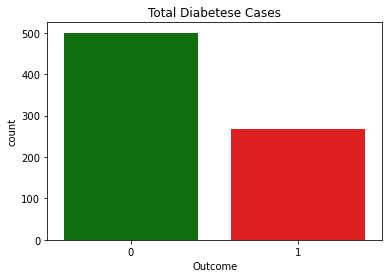

In [42]:
plt.title("Total Diabetese Cases")
sns.countplot(x='Outcome',data=diabetes_data, palette=["green", "red"])
plt.show()

#### <font color="green"> ***There are 500 non diabetic cases and 268 are diabetic cases***

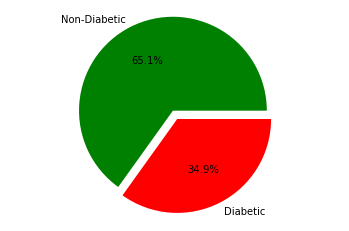

In [43]:
labels = "Non-Diabetic", "Diabetic"
sizes = diabetes_data.Outcome.value_counts()
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=['green','red'])
ax1.axis('equal')  
plt.show()

________________

### Analysis of 'Age' parameter

In [44]:
# Binning the age column
a=pd.Series([])
diabetes_data=diabetes_data
for i in diabetes_data.index:
    if(diabetes_data.loc[i:i,]['Age']<=24).bool():
        a=a.append(pd.Series(['21-24']))
    elif(diabetes_data.loc[i:i,]['Age']<=30).bool():
        a=a.append(pd.Series(['25-30']))
    elif(diabetes_data.loc[i:i,]['Age']<=40).bool():
        a=a.append(pd.Series(['31-40']))
    elif(diabetes_data.loc[i:i,]['Age']<=55).bool():
        a=a.append(pd.Series(['41-55']))
    else:
        a=a.append(pd.Series(['>55']))
a.reset_index(drop=True,inplace=True)
diabetes_data['Age_gp']=a
diabetes_data.head()

C:\Users\navya\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_gp
0,6,148,72.0,35,169.5,33.6,0.627,50,1,41-55
1,1,85,66.0,29,102.5,26.6,0.351,31,0,31-40
2,8,183,64.0,32,169.5,23.3,0.672,32,1,31-40
3,1,89,66.0,23,94.0,28.1,0.167,21,0,21-24
4,0,137,40.0,35,168.0,43.1,2.288,33,1,31-40


In [45]:
#Find the number of diabetic person in each age group

data1=diabetes_data[diabetes_data['Outcome']==1].groupby('Age_gp')[['Outcome']].count()
data1
data1.head()

,Outcome
Age_gp,
21-24,31
25-30,59
31-40,76
41-55,85
>55,17


In [46]:
# Percentage of diabetic Person in each age group

data2=diabetes_data.groupby('Age_gp')[['Outcome']].count()
data1['Diabetic %']=(data1['Outcome']/data2['Outcome'])*100
data1

,Outcome,Diabetic %
Age_gp,,
21-24,31,14.155251
25-30,59,29.797980
31-40,76,48.407643
41-55,85,59.027778
>55,17,34.000000


In [47]:
#pip install palettable

Note: you may need to restart the kernel to use updated packages.


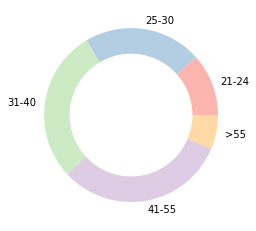

In [48]:
# Distribution of various age groups
my_circle=plt.Circle( (0,0), 0.7, color='white')
from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(data1['Outcome'], labels=data1.index, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

C:\Users\navya\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_gp', ylabel='Diabetic %'>

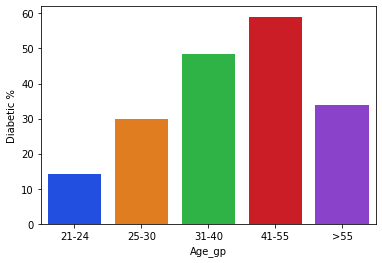

In [49]:
sns.barplot(data1.index,data1['Diabetic %'], palette='bright', color='salmon')

In [50]:
diabetes_data.drop(columns='Age_gp', inplace=True)

# Prediction: Model_Selection

In [51]:
diabetes_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [52]:
## Train Test Split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

In [53]:
X = diabetes_data[feature_columns].values
y = diabetes_data[predicted_class].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [54]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [55]:
# Logistic Regression
regressor=LogisticRegression()
regressor.fit(X_train, y_train)

C:\Users\navya\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\navya\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [56]:
y_pred=regressor.predict(X_test)

In [57]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[83, 12],
       [26, 33]], dtype=int64)

In [58]:
lr_recall=recall_score(y_test,y_pred)
lr_accuracy=accuracy_score(y_test,y_pred)
print("recall_score:",lr_recall)
print("accuracy_score:",lr_accuracy)

recall_score: 0.559322033898305
accuracy_score: 0.7532467532467533


<AxesSubplot:>

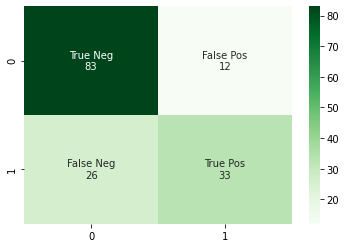

In [59]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

In [60]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

C:\Users\navya\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [61]:
y_pred=nb.predict(X_test)

In [62]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[82, 13],
       [23, 36]], dtype=int64)

In [63]:
nb_recall=recall_score(y_test,y_pred)
nb_accuracy=accuracy_score(y_test,y_pred)
print("recall_score:",nb_recall)
print("accuracy_score:",nb_accuracy)

recall_score: 0.6101694915254238
accuracy_score: 0.7662337662337663


<AxesSubplot:>

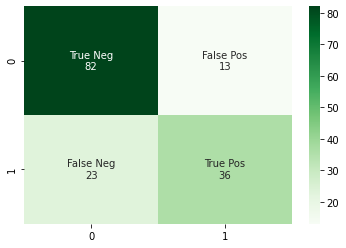

In [64]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

In [65]:
# Random Forest

random_forest_model = RandomForestClassifier(random_state=10)
random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [66]:
y_pred = random_forest_model.predict(X_test)

In [67]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[84, 11],
       [ 9, 50]], dtype=int64)

In [68]:
rf_recall=recall_score(y_test,y_pred)
rf_accuracy=accuracy_score(y_test,y_pred)
print("recall_score:",rf_recall)
print("accuracy_score:",rf_accuracy)

recall_score: 0.847457627118644
accuracy_score: 0.8701298701298701


<AxesSubplot:>

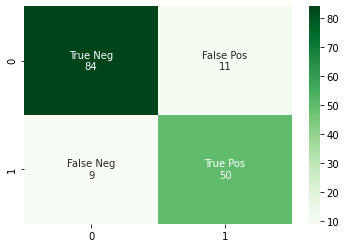

In [69]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

In [70]:
# XGBoost

In [71]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
#!pip install xgboost

In [72]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [73]:
classifier=xgboost.XGBClassifier()

In [74]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [75]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [76]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    5.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.5s finished



 Time taken: 0 hours 0 minutes and 5.98 seconds.


In [77]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
classifier.fit(X_train, y_train)

C:\Users\navya\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
y_pred=classifier.predict(X_test)

In [81]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[86,  9],
       [10, 49]], dtype=int64)

<AxesSubplot:>

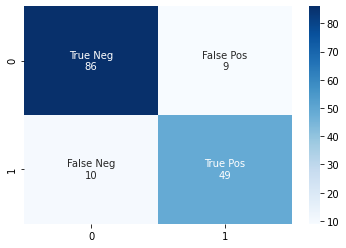

In [82]:
#sns.heatmap(cm, annot=True, cmap='Greens')
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [83]:
xg_recall=recall_score(y_test,y_pred)
xg_accuracy=accuracy_score(y_test,y_pred)
print("recall_score:",xg_recall)
print("accuracy_score:",xg_accuracy)

recall_score: 0.8305084745762712
accuracy_score: 0.8766233766233766


In [86]:
df_results=pd.DataFrame({'Classifier':['LR','NB','RF','Xgb'],
                       'Recall_Score':[lr_recall,nb_recall, rf_recall, xg_recall ],
                        'Accuracy_Score':[lr_accuracy, nb_accuracy, rf_accuracy, xg_accuracy]})

In [87]:
df_results

,Classifier,Recall_Score,Accuracy_Score
0,LR,0.559322,0.753247
1,NB,0.610169,0.766234
2,RF,0.847458,0.870130
3,Xgb,0.830508,0.876623


<AxesSubplot:xlabel='Classifier', ylabel='Accuracy_Score'>

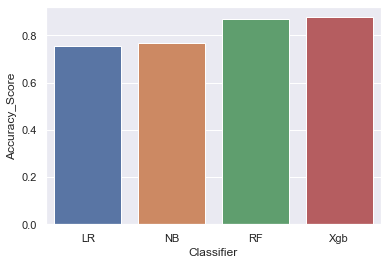

In [88]:
sns.set(style="darkgrid")
sns.barplot(x='Classifier', y="Accuracy_Score", data=df_results)

<AxesSubplot:xlabel='Classifier', ylabel='Recall_Score'>

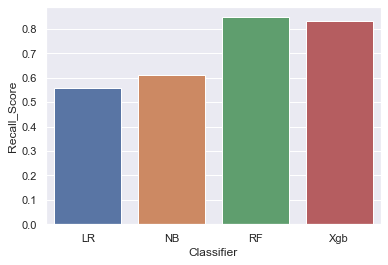

In [89]:
sns.set(style="darkgrid")
sns.barplot(x='Classifier', y="Recall_Score", data=df_results)

#### <font color='Brown'> Recall should be optimised over precision when there is a high cost associated with a False Negative, i.e. system predicts non diabetic when the patient is actually diabetic. 

<font color='Brown'> NOTE : If a patient’s is actually diabetic (Actual Positive) yet the system incorrectly predicted it as non diabetic (False Negative), that patient may suffer with serious issues if that goes undetected and untreated.  There is a high – and in this case irreversible – cost to getting the diagnosis wrong (death). Here, we want to minimise False Negatives at the risk of increasing False Positives.
    
#### <font color='Green'> Therfore, Random Forest and XgBoost give the best results but considering recall_score, would prefer Random Forest.

_______________